# Car Insurance Loan Dataset

Read https://www.kaggle.com/kondla/carinsurance?select=DSS_DMC_Description.pdf to know the data better. The main purpose of this data set is to predict CarInsurance i.e., whether the customer has subscribed to a car insurance or not.Hence, Classification is the most natural problem for this data set.  

Classification: CarInsurance is the y variable. 

Missing Values: This data set has a lot of missing values, we need to handle this issue properly before we can do classification. 
Dropping CallStart and CallEnd columns as the format is not accepted.

In [2]:
#For importing functions I wrote. You need to update this directory to where you store your python_all.py
import sys
sys.path.append('C:\\Users\\prernabajaj\\Desktop\\Python') 

import warnings 
warnings.simplefilter("ignore")  

import pandas as pd

data0=pd.read_csv('CarInsurance_train.csv')

data_rule=data0 # We keep a copy of the original data for association rule analysis.
data0=data0.drop(["CallStart","CallEnd","Outcome","Communication"], axis = 1) #dropping CallStart and CallEnd columns as the format is not accepted.
                                                        #Outcome and Communication has too many missing rows. 
data0=data0.fillna(data0.mean()) #Replace missing values of numeric attributes with the mean of the attribute

data0=data0.fillna('Missing') #Replace missing values of categorical attributes with string 'Missing'

data_clu=data0 #keep a copy of the data for clustering

data0.head(9).transpose()



,0,1,2,3,4,5,6,7,8
Id,1,2,3,4,5,6,7,8,9
Age,32,32,29,25,30,32,37,35,30
Job,management,blue-collar,management,student,management,technician,admin.,management,admin.
Marital,single,married,single,single,married,single,single,divorced,married
Education,tertiary,primary,tertiary,primary,tertiary,tertiary,tertiary,tertiary,secondary
Default,0,0,0,0,0,0,0,0,0
Balance,1218,1156,637,373,2694,1625,1000,538,187
HHInsurance,1,1,1,1,0,0,1,1,1
CarLoan,0,0,0,0,0,0,0,0,0
LastContactDay,28,26,3,11,3,22,17,12,18


In [3]:
from python_all import cat_to_dummy

data0=cat_to_dummy(data0,['Job','Marital','Education','LastContactMonth']) #Convert categorical values to 0/1. 
                                                                #Used for classification & numeric prediction   

data0.head().transpose()



,0,1,2,3,4
Id,1,2,3,4,5
Age,32,32,29,25,30
Default,0,0,0,0,0
Balance,1218,1156,637,373,2694
HHInsurance,1,1,1,1,0
CarLoan,0,0,0,0,0
LastContactDay,28,26,3,11,3
NoOfContacts,2,5,1,2,1
DaysPassed,-1,-1,119,-1,-1
PrevAttempts,0,0,1,0,0


## Classification Problem:
Predicting CarInsurance. Use stratified sampling to create training and testing data. There are 70% CarInsurance=0, and 30% CarInsurance=1, so 70% is the benchmark for the accuracy of the classification models built.  

In [4]:
from python_all import stratified_sample

X_train, X_test, y_train, y_test = stratified_sample(data0,'CarInsurance',0.7)

print('Class Distribution:',y_test.value_counts()/len(y_test))



Class Distribution: 0    0.599167
1    0.400833
Name: CarInsurance, dtype: float64


### Classification --- Decision Tree

The attribute "Communication_Missing" was taking the feature importance to estimate CarInsurance in the Decision Tree Model. Hence, this is the reason we are not considering the column "Communications" as there is a high number of missing values which is having a greater say in determining the y variable(CarInsurance).

Decision tree accuracy for test set: 0.6933333333333334

Classification report:
               precision    recall  f1-score   support

           0       0.68      0.92      0.78       719
           1       0.75      0.36      0.48       481

    accuracy                           0.69      1200
   macro avg       0.71      0.64      0.63      1200
weighted avg       0.71      0.69      0.66      1200


Feature Importance:
 [0.05241281 0.16657885 0.         0.05419258 0.1603828  0.0256132
 0.01096865 0.00725934 0.29433076 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.03024838 0.         0.         0.         0.
 0.06383165 0.         0.         0.         0.         0.
 0.         0.         0.         0.01107164 0.         0.
 0.080398   0.         0.         0.04271133 0.        ]
Index(['Id', 'Age', 'Default', 'Balance', 'HHInsurance', 'CarLoan',
       'LastContactDay', 'NoOfContacts', 'DaysPassed', 'PrevAttempts',
       'Job_M

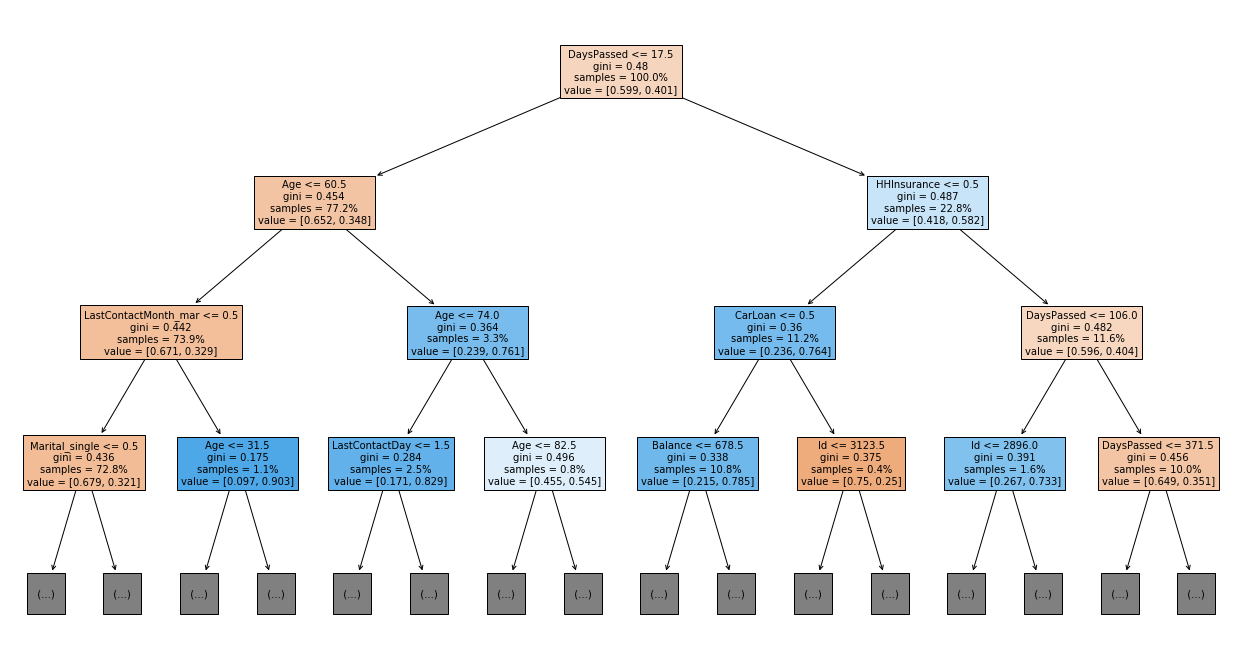

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt  
from sklearn.tree import export_text #Print the tree in text, since the graphical tree is too big to see the leaf nodes

model = DecisionTreeClassifier() 
dt = GridSearchCV(model, param_grid={"max_depth": [0,1,2,3,4,5,6,7,8,9]}) 
dt.fit(X_train, y_train) 
y_pred_dt = dt.predict(X_test)

print("Decision tree accuracy for test set:", dt.score(X_test, y_test)) 
print("\nClassification report:\n",classification_report(y_test, y_pred_dt))
print("\nFeature Importance:\n",dt.best_estimator_.feature_importances_)
print(X_train.columns) 

plt.subplots(figsize=(22, 12)) 
plot_tree(dt.best_estimator_, max_depth=3, feature_names=X_train.columns, filled=True, proportion=True, fontsize=10) 
plt.show()



Since we are not able to see the entire tree, we will also generate a text tree using export_text() which returns a string containing the entire tree. 

The feature_names parameter of export_text() requires a list of attribute names. X_train.columns returns an Index which is the column lables, then we use to_list() to convert it to a list.

show_weights=True will show the number of 0s and 1s in each leaf node instead of just the majority class.

Since the text tree is too big to fit this screen, we write the text tree (a string) to a .txt file. 




In [6]:
string1=export_text(dt.best_estimator_,feature_names=X_train.columns.to_list(),show_weights=True)

file1=open('Final_Text_Tree.txt','w')
file1.write(string1)
file1.close()



### Classification --- Logistic Regression 

In [7]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
logreg = GridSearchCV(model,param_grid={"penalty": ['l1','l2']})
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

print("Logistic regression accuracy for test set:", logreg.score(X_test, y_test))
print("\nClassification report:\n",classification_report(y_test, y_pred_log))
print('Intercept:',logreg.best_estimator_.intercept_)
print('\nCoefficients:\n',logreg.best_estimator_.coef_)
print(X_train.columns)



Logistic regression accuracy for test set: 0.6366666666666667

Classification report:
               precision    recall  f1-score   support

           0       0.66      0.82      0.73       719
           1       0.57      0.37      0.45       481

    accuracy                           0.64      1200
   macro avg       0.62      0.59      0.59      1200
weighted avg       0.62      0.64      0.62      1200

Intercept: [-0.01376283]

Coefficients:
 [[-1.23561487e-04  1.87328979e-02 -7.59521063e-03  3.02518658e-06
  -1.71143600e-01 -4.49084582e-02 -3.08391698e-02 -1.31978602e-01
   7.08854895e-05  1.94682997e-01  1.73752594e-03 -2.70477787e-03
  -8.17877565e-02 -6.25851852e-03 -1.64952142e-03  2.21995269e-02
   4.10783939e-02 -2.85796632e-03 -2.09445236e-02  2.74103072e-02
  -7.94286233e-03  1.79620197e-02  1.02070167e-02 -9.67346263e-02
   7.27694567e-02  1.10141613e-02 -3.14774181e-02 -5.59489915e-02
   6.26540955e-02  2.20675465e-02 -2.41817602e-02  1.20813902e-02
   1.72616128e-02

### Classification --- Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
rf = GridSearchCV(model,param_grid={"max_depth": [0,1,2,3,4,5,6,7,8,9]})
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random forest accuracy for test set:", rf.score(X_test, y_test))
print("\nClassification report:\n",classification_report(y_test, y_pred_rf))



Random forest accuracy for test set: 0.7141666666666666

Classification report:
               precision    recall  f1-score   support

           0       0.71      0.90      0.79       719
           1       0.74      0.44      0.55       481

    accuracy                           0.71      1200
   macro avg       0.72      0.67      0.67      1200
weighted avg       0.72      0.71      0.69      1200



As per the output we can see that the Accuracy of Random Forest is the highest (0.71167) compared to Decision Tree (0.6958) and Logistic Regression (0.63667)

From the co-efficient of Logistic Regression Model, Marital_Single has the steepest linear relationship with CarInsurance. 

The feature importance from Decision Tree Model states that Days_Passed (Number of days that passed by
after the client was last contacted from a previous campaign) is the most important feature to estimate whether a client has subscribed to a car insurance. 